The reference point is [3145.0, 1436.0].
The Pareto points of ABC are [(3071.0, 861.0), (2544.0, 1135.0), (3073.0, 861.0), (3081.0, 857.0), (3068.0, 864.0), (2538.0, 1158.0), (3037.0, 870.0), (2503.0, 1223.0), (3060.0, 868.0), (3069.0, 861.0)].
The Pareto points of EsynTurbo are [(2337.0, 1034.0), (3050.0, 866.0), (2993.0, 872.0), (2188.0, 1042.0), (1009.0, 1434.0), (2820.0, 928.0), (3056.0, 863.0), (3061.0, 862.0), (2718.0, 932.0), (3064.0, 861.0), (2914.0, 916.0), (2945.0, 897.0), (1297.0, 1217.0), (1502.0, 1204.0), (2893.0, 920.0), (1547.0, 1178.0), (1230.0, 1245.0), (2106.0, 1068.0), (1128.0, 1289.0), (2453.0, 1002.0), (3060.0, 862.0), (2639.0, 994.0)].
The hypervolume of ABC is 219606.00, and the hypervolume of EsynTurbo is 706793.00.
The hypervolume ratio of ABC/EsynTurbo is 0.31.


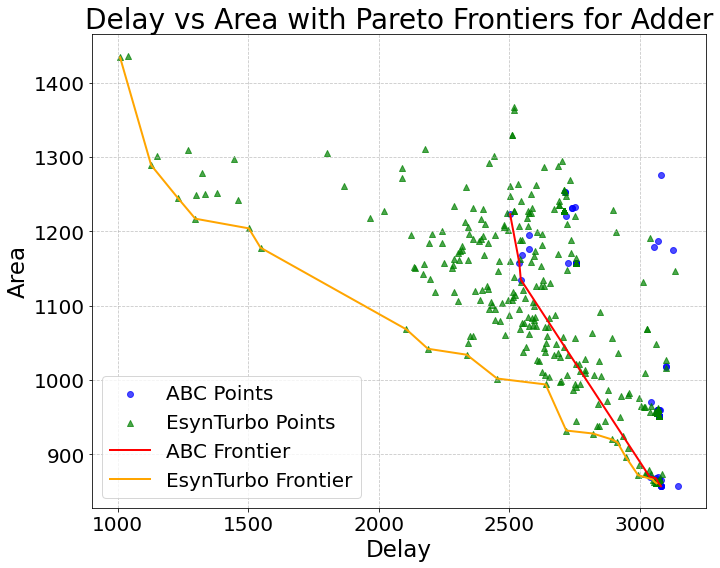

In [33]:
import matplotlib.pyplot as plt
import csv
from hv import HyperVolume
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

def parse_csv(filename):
    with open(filename, 'r') as file:
        data = {}
        for index, row in enumerate(file):
            if row.strip():
                area, delay = map(float, row.strip().split()[-2:])
                data[index] = (delay, area)
        return data


def calculate_hypervolume(pareto_points, reference_point):
    unique_pareto_points = sorted(set(map(tuple, pareto_points)))
    hypervolume = 0
    for i in range(len(unique_pareto_points)):
        width = (reference_point[0] - unique_pareto_points[i][0]) if i == 0 else (unique_pareto_points[i-1][0] - unique_pareto_points[i][0])
        height = reference_point[1] - unique_pareto_points[i][1]
        hypervolume += width * height
    return abs(hypervolume)


def find_pareto_frontier(x_values, y_values, maximize_x=False, maximize_y=False):
    sorted_points = sorted(zip(x_values, y_values), reverse=maximize_y)
    pareto_front = [sorted_points[0]]
    for point in sorted_points[1:]:
        if (maximize_y and point[1] >= pareto_front[-1][1]) or (not maximize_y and point[1] <= pareto_front[-1][1]):
            pareto_front.append(point)
    return sorted(pareto_front, key=lambda x: x[0], reverse=maximize_x)


def plot_pareto_frontier(filename1, filename2, title, output_filename):
    data1 = parse_csv(filename1)
    delays1, areas1 = zip(*data1.values())

    data2 = parse_csv(filename2)
    delays2, areas2 = zip(*data2.values())

    pareto1 = find_pareto_frontier(delays1, areas1)
    pareto_x1, pareto_y1 = zip(*pareto1)

    pareto2 = find_pareto_frontier(delays2, areas2)
    pareto_x2, pareto_y2 = zip(*pareto2)

    max_delay, max_area = max(delays1 + delays2), max(areas1 + areas2)

    reference_point = [max_delay, max_area]
    hypervolume = HyperVolume(reference_point)
    result1 = hypervolume.compute(list(map(list, set(map(tuple, pareto1)))))
    result2 = hypervolume.compute(list(map(list, set(map(tuple, pareto2)))))
    ratio = result1 / result2

    print(f'The reference point is {reference_point}.')
    print(f'The Pareto points of ABC are {list(set(map(tuple, pareto1)))}.')
    print(f'The Pareto points of EsynTurbo are {list(set(map(tuple, pareto2)))}.')
    print(f'The hypervolume of ABC is {result1:.2f}, and the hypervolume of EsynTurbo is {result2:.2f}.')
    print(f'The hypervolume ratio of ABC/EsynTurbo is {ratio:.2f}.')

    plt.figure(figsize=(10, 8))
    plt.scatter(delays1, areas1, color='blue', label='ABC Points', alpha=0.7, marker='o')
    plt.scatter(delays2, areas2, color='green', label='EsynTurbo Points', alpha=0.7, marker='^')
    plt.plot(pareto_x1, pareto_y1, color='red', label='ABC Frontier', linewidth=2)
    plt.plot(pareto_x2, pareto_y2, color='orange', label='EsynTurbo Frontier', linewidth=2)
    plt.xlabel('Delay', fontsize=23)
    plt.ylabel('Area', fontsize=23)
    plt.title(title, fontsize=28)
    plt.legend(fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(labelsize=20)
    plt.tight_layout()

    plt.savefig(output_filename, bbox_inches='tight')
    plt.show()


# Usage
plot_pareto_frontier(
    '../fuzz_abc_opt_flow/stats_ori_adder_500.txt',
    '../fuzz_abc_opt_flow/stats_opt_adder_400.txt',
    'Delay vs Area with Pareto Frontiers for Adder',
    '../fuzz_abc_opt_flow/EPFL_adder_pareto.pdf'
)